## Step 1. Importing data

In [30]:
#import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# read_csv function

folder_name = 'Fibrazo'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df


In [32]:
df_clients = read_csv_fun('Fibrazo','clients', dir)
print(df_clients.head(5))

df_client_journey = read_csv_fun('Fibrazo','client_journey', dir)
print(df_client_journey.head(5))

df_invoices = read_csv_fun('Fibrazo','invoices', dir)
print(df_invoices.head(5))

      id  gaiia_id         status gaiia_status          City          name  \
0  54213   57771.0  Instalaciones       ACTIVE  Barranquilla  SANTODOMINGO   
1  69104   71312.0  Instalaciones       ACTIVE  Barranquilla      CARRIZAL   
2  16311   24969.0  Instalaciones    SUSPENDED     Cartagena    VILLA ROSA   
3  68472   70721.0  Instalaciones       ACTIVE  Barranquilla   SANTA MARIA   
4  15285   24147.0  Instalaciones       ACTIVE     Cartagena    VILLA ROSA   

                created_at  
0  2025-01-14 12:10:45.000  
1  2025-03-12 17:00:00.000  
2  2024-06-06 14:51:15.000  
3  2025-03-10 17:00:00.000  
4  2024-05-27 21:21:40.000  
   gaiia_id                     date          status
0     15332  2023-07-31 05:24:36.783       SUSPENDED
1     17155  2023-07-31 05:24:37.897  SUSPENDED-LEAD
2     16629  2023-07-31 05:24:38.540  SUSPENDED-LEAD
3     16987  2023-07-31 05:24:39.609       SUSPENDED
4     16609  2023-07-31 05:24:40.071       SUSPENDED
      id               created_at  clie

## Step 2. Glimpse on the data

In [33]:
display(
    df_clients.head(5)
)

display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

display(
    df_clients.info()
)

display(
    df_clients.value_counts("status")
)

display(
    df_clients.value_counts("gaiia_status")
)

display(
    df_clients.value_counts("City")
)

# Michael notes:
# we have 1 missing gaiia_id on the dataframe
# some columns need to be converted to other Data type for analysis. Ej: created_at      


,id,gaiia_id,status,gaiia_status,City,name,created_at
0,54213,57771.0,Instalaciones,ACTIVE,Barranquilla,SANTODOMINGO,2025-01-14 12:10:45.000
1,69104,71312.0,Instalaciones,ACTIVE,Barranquilla,CARRIZAL,2025-03-12 17:00:00.000
2,16311,24969.0,Instalaciones,SUSPENDED,Cartagena,VILLA ROSA,2024-06-06 14:51:15.000
3,68472,70721.0,Instalaciones,ACTIVE,Barranquilla,SANTA MARIA,2025-03-10 17:00:00.000
4,15285,24147.0,Instalaciones,ACTIVE,Cartagena,VILLA ROSA,2024-05-27 21:21:40.000


id              0
gaiia_id        1
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48591


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48591 non-null  int64  
 1   gaiia_id      48590 non-null  float64
 2   status        48591 non-null  object 
 3   gaiia_status  48591 non-null  object 
 4   City          48591 non-null  object 
 5   name          48591 non-null  object 
 6   created_at    48591 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


None

status
Instalaciones    48298
Ventas             293
dtype: int64

gaiia_status
ACTIVE       30012
SUSPENDED    12109
INACTIVE      6118
PENDING        352
dtype: int64

City
Cartagena       36771
Barranquilla    11820
dtype: int64

In [34]:
## Is id a primary key?
df_clients = df_clients.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_clients["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_clients["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_clients["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_clients[df_clients.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


In [35]:
display(
    df_client_journey.head(5)
)

display(
    print(df_client_journey.isna().sum())
    )

display(
    print(len(df_client_journey))
    )

display(
    df_client_journey.info()
)

display(
    df_client_journey.value_counts("status")
)

# Michael notes:
# some columns need to be converted to other Data type for analysis. Ej: date


,gaiia_id,date,status
0,15332,2023-07-31 05:24:36.783,SUSPENDED
1,17155,2023-07-31 05:24:37.897,SUSPENDED-LEAD
2,16629,2023-07-31 05:24:38.540,SUSPENDED-LEAD
3,16987,2023-07-31 05:24:39.609,SUSPENDED
4,16609,2023-07-31 05:24:40.071,SUSPENDED


gaiia_id    0
date        0
status      0
dtype: int64


None

796867


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796867 entries, 0 to 796866
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gaiia_id  796867 non-null  int64 
 1   date      796867 non-null  object
 2   status    796867 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.2+ MB


None

status
ACTIVE            397111
SUSPENDED         374609
TRIAL               8608
SUSPENDED-LEAD      5884
INACTIVE            4458
INACTIVE-LEAD       4030
PENDING             2166
LEAD                   1
dtype: int64

In [36]:
## Is gaiia_id a primary key?
df_client_journey = df_client_journey.sort_values(by="gaiia_id", ascending=True)

# Check 1: Uniqueness of `gaiia_id`
is_unique = df_client_journey["gaiia_id"].is_unique
print(f"Is `gaiia_id` unique? {is_unique}")

# Check 2: Non-Null Values in `gaiia_id`
has_nulls = df_client_journey["gaiia_id"].isnull().any()
print(f"Does `gaiia_id` have null values? {has_nulls}")

# Check 3: Incremental Values in `gaiia_id`
is_incremental = df_client_journey["gaiia_id"].is_monotonic_increasing
print(f"Is `gaiia_id` incremental? {is_incremental}")

# Check for Duplicates in `gaiia_id`
duplicates = df_client_journey[df_client_journey.duplicated("gaiia_id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `gaiia_id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `gaiia_id` values found.")

Is `gaiia_id` unique? False
Does `gaiia_id` have null values? False
Is `gaiia_id` incremental? True

Duplicate `gaiia_id` values found:


,gaiia_id,date,status
44883,15001,2024-02-14 14:46:12.312,ACTIVE
23425,15001,2023-11-27 17:20:09.776,SUSPENDED
15065,15001,2023-10-18 22:24:50.994,SUSPENDED
132370,15001,2024-07-17 19:52:49.736,SUSPENDED
132372,15001,2024-07-17 19:54:54.227,ACTIVE
...,...,...,...
796711,67743,2025-03-14 06:04:00.047,SUSPENDED-LEAD
796771,67748,2025-03-14 06:04:21.842,SUSPENDED-LEAD
751361,67748,2025-02-26 20:11:30.845,TRIAL
751507,67846,2025-02-26 21:01:42.388,TRIAL


In [37]:
display(
    df_invoices.head(5)
)

display(
    print(df_invoices.isna().sum())
    )

display(
    print(len(df_invoices))
    )

display(
    df_invoices.info()
)

display(
    df_invoices.value_counts("payment_gateway")
)

# Michael notes:
# some columns need to be converted to other Data type for analysis. Ej: created_at

,id,created_at,client_id,payment_gateway
0,14183,2024-05-01 00:04:24.000,5688,NEQUI
1,14190,2024-05-01 00:07:08.000,8628,NEQUI
2,14180,2024-05-01 00:13:57.000,11289,SUPER_GIROS
3,14184,2024-05-01 00:24:50.000,6757,SUPER_GIROS
4,14185,2024-05-01 00:26:05.000,7607,SUPER_GIROS


id                 0
created_at         0
client_id          0
payment_gateway    0
dtype: int64


None

424464


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424464 entries, 0 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               424464 non-null  int64 
 1   created_at       424464 non-null  object
 2   client_id        424464 non-null  int64 
 3   payment_gateway  424464 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.0+ MB


None

payment_gateway
NEQUI                    397146
SUPER_GIROS               22355
MERCADO_PAGO_TRANSFER      2726
GIFT                       1949
PAYVALIDA_TRANSFER          288
dtype: int64

In [38]:
## Is id a primary key?
df_invoices = df_invoices.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_invoices["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_invoices["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_invoices["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_invoices[df_invoices.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


## Step 3. Cleaning Data

In [39]:
#Dropping missing values
threshold = len(df_clients) * 0.05
print(threshold)

cols_to_drop = df_clients.columns[df_clients.isna().sum() <= threshold]
print(cols_to_drop)

df_clients.dropna(subset=cols_to_drop, inplace=True)

# Michael notes:
#Seems to be just one register, and without this field, 
# it is not possible to perform all the intended joins, 
# the goal is to find trends in the data, 
# so it is convenient to drop the only missing one

2429.55
Index(['id', 'gaiia_id', 'status', 'gaiia_status', 'City', 'name',
       'created_at'],
      dtype='object')


In [40]:
display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

id              0
gaiia_id        0
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48590


None

In [41]:
#Transforming data columns into the correct Dtype
df_clients["created_at"] = pd.to_datetime(df_clients["created_at"])

df_client_journey["date"] = pd.to_datetime(df_client_journey["date"])

df_invoices["created_at"] = pd.to_datetime(df_invoices["created_at"])

In [42]:
display(
    df_clients.info()
)

display(
    df_client_journey.info()
)

display(
    df_invoices.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48590 entries, 42832 to 2280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            48590 non-null  int64         
 1   gaiia_id      48590 non-null  float64       
 2   status        48590 non-null  object        
 3   gaiia_status  48590 non-null  object        
 4   City          48590 non-null  object        
 5   name          48590 non-null  object        
 6   created_at    48590 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 44883 to 794440
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gaiia_id  796867 non-null  int64         
 1   date      796867 non-null  datetime64[ns]
 2   status    796867 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424464 entries, 888 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               424464 non-null  int64         
 1   created_at       424464 non-null  datetime64[ns]
 2   client_id        424464 non-null  int64         
 3   payment_gateway  424464 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 16.2+ MB


None

In [43]:
min_date = df_clients["created_at"].min()
max_date = df_clients["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_clients["year"] = df_clients["created_at"].dt.year

display(
    df_clients.value_counts("year")
)

# Michael notes:
# we seem to have two records with time outlyers
# records make sense to be between 2023-2025
# 1996 and 1964 are way back before company creation, this is inconsistent data

Minimum Date: 1964-07-20 10:50:09
Maximum Date: 2025-03-13 22:40:11


year
2024    32249
2025    12009
2023     4330
1964        1
1996        1
dtype: int64

In [44]:
min_date = df_client_journey["date"].min()
max_date = df_client_journey["date"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_client_journey["year"] = df_client_journey["date"].dt.year

display(
    df_client_journey.value_counts("year")
)

# Michael notes:
# records make sense to be between 2023-2025

Minimum Date: 2023-07-31 05:24:36.783000
Maximum Date: 2025-03-14 06:06:59.163000


year
2024    460823
2025    304603
2023     31441
dtype: int64

In [45]:
min_date = df_invoices["created_at"].min()
max_date = df_invoices["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_invoices["year"] = df_invoices["created_at"].dt.year

display(
    df_invoices.value_counts("year")
)

# Michael notes:
# records are available between 2024-2025 this may limit our scope of analysis
# to provide a clear trend using payment_gateway info

Minimum Date: 2024-05-01 00:04:24
Maximum Date: 2025-03-14 15:35:06


year
2024    227619
2025    196845
dtype: int64

In [46]:
# Michael notes:
# On this case the most reasonable thing to do is to drop inconsistent date data 
# since there is only one created_at per client id, there is no other way to imput it
# also this are only two rows of data, 0.004% of df_clients

outliers = df_clients[df_clients["created_at"].dt.year.isin([1996, 1964])]
print(outliers)

df_clients = df_clients[~df_clients["created_at"].dt.year.isin([1996, 1964])]


         id  gaiia_id         status gaiia_status       City  \
38938  4794   16910.0  Instalaciones     INACTIVE  Cartagena   
39631  5634   17750.0  Instalaciones     INACTIVE  Cartagena   

                   name          created_at  year  
38938  UB NUEVA VENECIA 1996-11-28 16:34:09  1996  
39631     LA CANDELARIA 1964-07-20 10:50:09  1964  


In [47]:
display(
    df_clients.value_counts("year")
)

year
2024    32249
2025    12009
2023     4330
dtype: int64

In [48]:
print(df_client_journey[df_client_journey["gaiia_id"] == 15103].value_counts("status"))

status
ACTIVE       11
SUSPENDED    10
INACTIVE      1
PENDING       1
dtype: int64


## Step 4. Feature Engineering

In [49]:
# Create the churned column
df_client_journey["churned"] = df_client_journey["status"].apply(
    lambda x: 1 if x in ["SUSPENDED", "INACTIVE", "SUSPENDED-LEAD", "INACTIVE-LEAD"] else 0
)

print(df_client_journey.head())

        gaiia_id                    date     status  year  churned
44883      15001 2024-02-14 14:46:12.312     ACTIVE  2024        0
23425      15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1
15065      15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1
132370     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1
132372     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0


In [50]:
# Create the Retained column
df_client_journey["retained"] = df_client_journey["status"].apply(
    lambda x: 1 if x in ["ACTIVE", "TRIAL", "LEAD", "PENDING"] else 0
)

print(df_client_journey.head())

        gaiia_id                    date     status  year  churned  retained
44883      15001 2024-02-14 14:46:12.312     ACTIVE  2024        0         1
23425      15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1         0
15065      15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1         0
132370     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1         0
132372     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0         1


In [51]:
# Create the subscription_duration column
# Function to calculate subscription duration for each client
def calculate_subscription_duration(group):
    
    group = group.sort_values(by="date")
    durations = []
    
    # Iterate through the group to calculate durations
    for i in range(len(group)):
        if group.iloc[i]["status"] in ["ACTIVE", "TRIAL", "LEAD", "PENDING"]:
            for j in range(i + 1, len(group)):
                if group.iloc[j]["status"] in ["SUSPENDED", "INACTIVE", "SUSPENDED-LEAD", "INACTIVE-LEAD"]:
                    duration = (group.iloc[j]["date"] - group.iloc[i]["date"]).days
                    durations.append({
                        "gaiia_id": group.iloc[i]["gaiia_id"],
                        "active_date": group.iloc[i]["date"],
                        "subscription_duration": duration
                    })
                    break  # Stop after finding the closest event
    
    durations_df = pd.DataFrame(durations)
    return durations_df

subscription_durations = df_client_journey.groupby("gaiia_id").apply(calculate_subscription_duration).reset_index(drop=True)

df_client_journey = df_client_journey.merge(
    subscription_durations,
    left_on=["gaiia_id", "date"],
    right_on=["gaiia_id", "active_date"],
    how="left"
)

# Drop the temporary active_date column
df_client_journey = df_client_journey.drop(columns=["active_date"])

display(df_client_journey.head())
display(
    df_client_journey.value_counts("subscription_duration").head(15))

,gaiia_id,date,status,year,churned,retained,subscription_duration
0,15001,2024-02-14 14:46:12.312,ACTIVE,2024,0,1,0.0
1,15001,2023-11-27 17:20:09.776,SUSPENDED,2023,1,0,NaN
2,15001,2023-10-18 22:24:50.994,SUSPENDED,2023,1,0,NaN
3,15001,2024-07-17 19:52:49.736,SUSPENDED,2024,1,0,NaN
4,15001,2024-07-17 19:54:54.227,ACTIVE,2024,0,1,0.0


subscription_duration
7.0     83434
1.0     74808
10.0    41509
2.0     36529
15.0    31709
30.0    22715
4.0     12590
3.0      8270
8.0      7540
31.0     6360
5.0      5921
46.0     4319
14.0     4170
0.0      2656
37.0     2612
dtype: int64

In [52]:
# Create the subscription_duration_type column

# Define the mapping logic
def map_subscription_duration(duration):
    if pd.isna(duration):
        return "N/A"
    elif duration <= 1:
        return "1 day"
    elif duration == 2:
        return "2 days"
    elif duration > 2 and duration < 7:
        return "3-6 days"
    elif duration == 7:
        return "1 week"
    elif duration > 7 and duration < 10:
        return "8-9 days"
    elif duration == 10:
        return "10 days"
    elif duration > 10 and duration < 15:
        return "11-14 days"
    elif duration == 15:
        return "15 days"
    elif duration > 15 and duration < 30:
        return "16-29 days"
    elif duration == 30:
        return "1 month"
    else:
        return "+ 1 month"

df_client_journey["subscription_duration_type"] = df_client_journey["subscription_duration"].apply(map_subscription_duration)

print(df_client_journey[["gaiia_id", "date", "status", "subscription_duration", "subscription_duration_type"]].head())

display(
    df_client_journey.value_counts("subscription_duration_type")
)

   gaiia_id                    date     status  subscription_duration  \
0     15001 2024-02-14 14:46:12.312     ACTIVE                    0.0   
1     15001 2023-11-27 17:20:09.776  SUSPENDED                    NaN   
2     15001 2023-10-18 22:24:50.994  SUSPENDED                    NaN   
3     15001 2024-07-17 19:52:49.736  SUSPENDED                    NaN   
4     15001 2024-07-17 19:54:54.227     ACTIVE                    0.0   

  subscription_duration_type  
0                      1 day  
1                        N/A  
2                        N/A  
3                        N/A  
4                      1 day  


subscription_duration_type
N/A           415666
1 week         83434
1 day          77464
10 days        41509
2 days         36529
15 days        31709
+ 1 month      31073
3-6 days       29017
1 month        22715
16-29 days      9946
8-9 days        8987
11-14 days      8818
dtype: int64

In [53]:
## Create new time columns

df_client_journey["year"] = df_client_journey["date"].dt.year
df_client_journey["month"] = df_client_journey["date"].dt.month
df_client_journey["weekday"] = df_client_journey["date"].dt.day_name()
df_client_journey["week_number"] = df_client_journey["date"].dt.isocalendar().week
df_client_journey["year_month"] = df_client_journey["year"].astype(str) + "_" + df_client_journey["month"].astype(str)
df_client_journey["year_week"] = df_client_journey["year"].astype(str) + "_" + df_client_journey["week_number"].astype(str)

In [54]:
#update dtypes for dates

df_client_journey["year_month"] = pd.to_datetime(df_client_journey["year_month"], format="%Y_%m")
df_client_journey_1 = df_client_journey.sort_values("year_month")

df_client_journey["year_week"] = pd.to_datetime(
    df_client_journey["year_week"] + "_1",  # Append "_1" for Monday
    format="%Y_%W_%w"
)

df_client_journey = df_client_journey.sort_values("year_week")

display(
    df_client_journey.info()
)

# Michael notes: Now we have clean data and enough information to start the data analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 22051 to 335893
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   gaiia_id                    796867 non-null  int64         
 1   date                        796867 non-null  datetime64[ns]
 2   status                      796867 non-null  object        
 3   year                        796867 non-null  int64         
 4   churned                     796867 non-null  int64         
 5   retained                    796867 non-null  int64         
 6   subscription_duration       381201 non-null  float64       
 7   subscription_duration_type  796867 non-null  object        
 8   month                       796867 non-null  int64         
 9   weekday                     796867 non-null  object        
 10  week_number                 796867 non-null  UInt32        
 11  year_month                  796867 

None

## Step 5. Analyze Churn Trends

   year_week metric  value
0 2023-07-31  churn    412
1 2023-08-07  churn    538
2 2023-08-14  churn    675
3 2023-08-21  churn    579
4 2023-08-28  churn    741


C:\Users\mcaba\AppData\Local\Temp\ipykernel_26084\1742732608.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


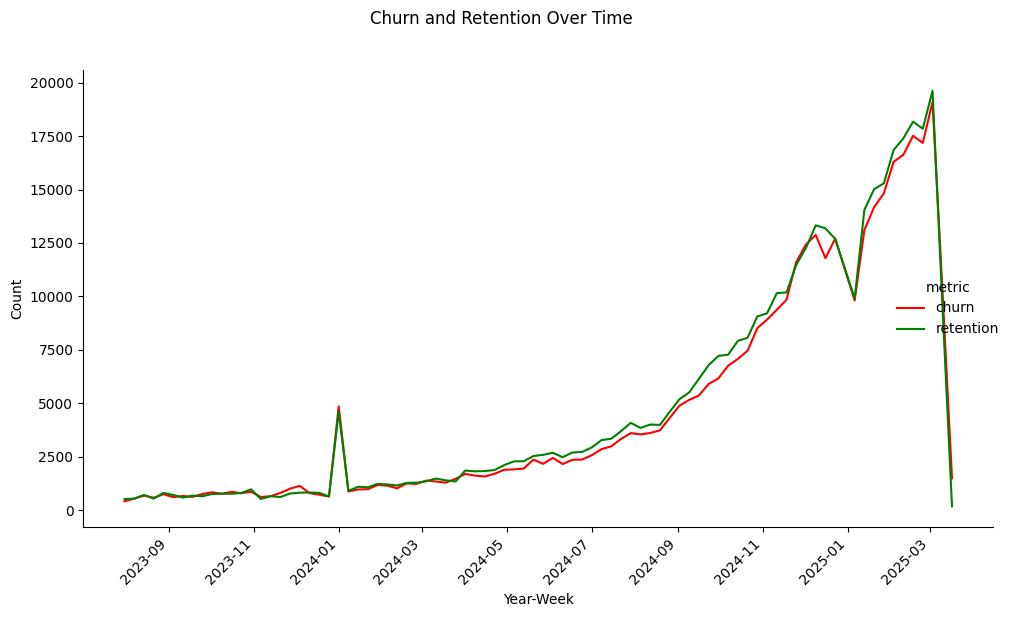

In [55]:
# Churn and Retention Over Time

df_client_journey_1 = df_client_journey.groupby("year_week").agg(
    churn=("churned", "sum"),
    retention=("retained", "sum") 
).reset_index()

# Melt the DataFrame
df_long = df_client_journey_1.melt(
    id_vars=["year_week"], 
    value_vars=["churn", "retention"], 
    var_name="metric", 
    value_name="value"
)

print(df_long.head())

palette = {"churn": "red", "retention": "green"}

# Create a line plot with Seaborn
g = sns.relplot(
    data=df_long, 
    x="year_week", 
    y="value", 
    hue="metric", 
    kind="line", 
    palette= palette,  
    height=6, 
    aspect=1.5 
)

g.set_axis_labels("Year-Week", "Count")
g.fig.suptitle("Churn and Retention Over Time", y=1.02)  # Add a title

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Churn and Retention over time display are strongly correlated and show company growth in the last couple of months, there is constant growth for both retention and churn, and there is also a positive peak at the start of January 2024, this might be a possible outcome of a sales campaign, however, the curve returns to normal, showing that company had an increase in new clients that had the opportunity to test the service, but did not continue on it. Also, there was a negative peak at the start of January 2025, but this time, we have an exponential increase.

     weekday  churned
1     Monday    56737
3     Sunday    56298
6  Wednesday    55952
2   Saturday    55711
0     Friday    55149


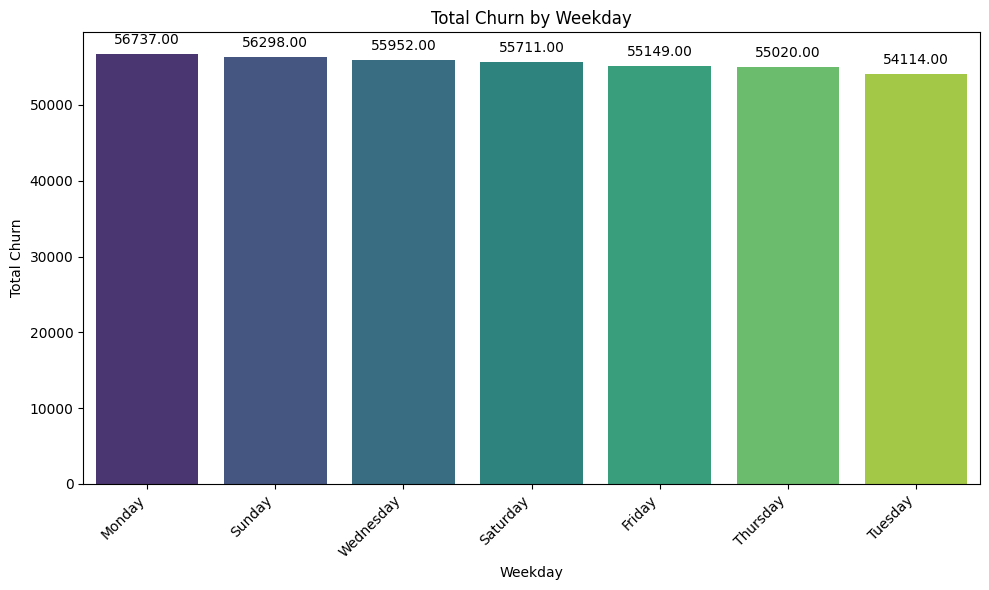

In [56]:
# Total Churn by Weekday
df_client_journey_2 = df_client_journey.groupby("weekday")["churned"].sum().reset_index()
df_client_journey_2 = df_client_journey_2.sort_values("churned", ascending=False)
print(df_client_journey_2.head())

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_client_journey_2, 
    x="weekday", 
    y="churned", 
    palette="viridis",
    order=df_client_journey_2["weekday"]
)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",  # Format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.xlabel("Weekday")
plt.ylabel("Total Churn")
plt.title("Total Churn by Weekday")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Monday and Sunday are the days of the week with the biggest share of churn, it would be advised to create an automatic cell phone pop-up, or email-inbox campaign during these days as a reminder for clients that would like to renovate or take a longer internet subscription.

  subscription_duration_type  retention
3                     1 week      83434
1                      1 day      77464
4                    10 days      41509
8                     2 days      36529
6                    15 days      31709


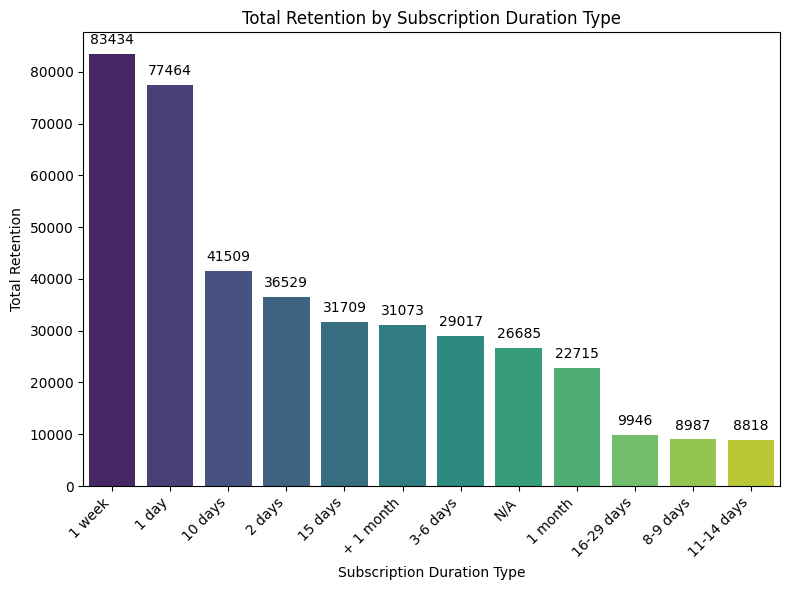

In [57]:
# Total Retention by Subscription Duration Type
df_client_journey_3 = df_client_journey.groupby("subscription_duration_type").agg(
    retention=("retained", "sum")  
).reset_index()


df_client_journey_3 = df_client_journey_3.sort_values("retention", ascending=False)
print(df_client_journey_3.head())

# Create a bar plot
plt.figure(figsize=(8, 6)) 
ax = sns.barplot(
    data=df_client_journey_3, 
    x="subscription_duration_type", 
    y="retention", 
    palette="viridis",  
    order=df_client_journey_3["subscription_duration_type"]  
)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center',
        xytext=(0, 10), 
        textcoords='offset points'
    )


plt.xlabel("Subscription Duration Type")
plt.ylabel("Total Retention")
plt.title("Total Retention by Subscription Duration Type")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### 1 week and 1-day internet subscriptions are the top subscription duration types, a seasonal deal with both subscription types might increase retention.

  subscription_duration_type   duration
0                  + 1 month  1630536.0
2                    1 month   681450.0
3                     1 week   584038.0
6                    15 days   475635.0
4                    10 days   415090.0


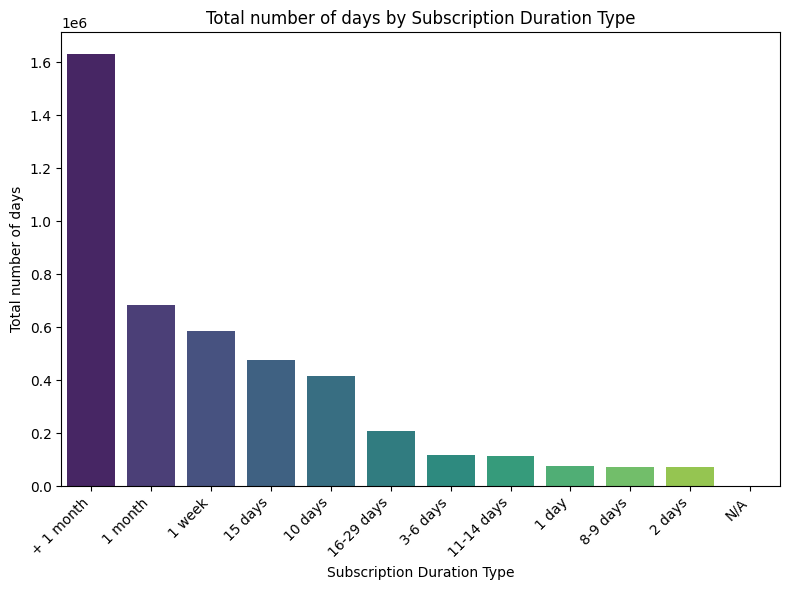

In [58]:
# Example: Aggregate retention by month and subscription_duration_type
df_client_journey_4 = df_client_journey.groupby("subscription_duration_type").agg(
    duration=("subscription_duration", "sum")  
).reset_index()

df_client_journey_4 = df_client_journey_4.sort_values("duration", ascending=False)

print(df_client_journey_4.head())

plt.figure(figsize=(8, 6)) 
sns.barplot(
    data=df_client_journey_4, 
    x="subscription_duration_type", 
    y="duration",
    palette="viridis" 
)

plt.xlabel("Subscription Duration Type")
plt.ylabel("Total number of days")
plt.title("Total number of days by Subscription Duration Type")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Clients that purchased 1 month or more had longer subscription duration, meaning that despite having more new deals with 1 day or 1 week, only clients with +1 month enjoy more total number of days with an internet subscription.

## Step 6. Identify Key Drivers of Churn

In [59]:
# Prepare data to join client table
df_client_journey_sum = df_client_journey.groupby("gaiia_id").agg(
    status_changes=("status", "count"),  
    total_churned=("churned", "sum"),  
    total_retained=("retained", "sum"), 
    mean_subscription_duration=("subscription_duration", "mean"),  
    total_subscription_duration=("subscription_duration", "sum") 
).reset_index()

print(df_client_journey_sum.head())

   gaiia_id  status_changes  total_churned  total_retained  \
0     15001              87             41              46   
1     15002              44             15              29   
2     15003             106             51              55   
3     15004              12              6               6   
4     15005               2              1               1   

   mean_subscription_duration  total_subscription_duration  
0                    9.565217                        440.0  
1                   36.689655                       1064.0  
2                    8.555556                        462.0  
3                    5.000000                         30.0  
4                   14.000000                         14.0  


In [60]:
# Prepare data to join client table
df_client_journey_sum_by_type = df_client_journey.groupby(
    ["gaiia_id", "subscription_duration_type", "year_month"]
).agg(
    status_changes=("status", "count"),  
    total_churned=("churned", "sum"),  
    total_retained=("retained", "sum"), 
    mean_subscription_duration=("subscription_duration", "mean"),  
    total_subscription_duration=("subscription_duration", "sum") 
).reset_index()

print(df_client_journey_sum_by_type.head())

   gaiia_id subscription_duration_type year_month  status_changes  \
0     15001                  + 1 month 2024-08-01               2   
1     15001                  + 1 month 2024-09-01               1   
2     15001                  + 1 month 2025-01-01               1   
3     15001                      1 day 2023-10-01               4   
4     15001                      1 day 2023-11-01               7   

   total_churned  total_retained  mean_subscription_duration  \
0              0               2                       89.00   
1              0               1                       52.00   
2              0               1                       47.00   
3              0               4                        0.25   
4              0               7                        0.00   

   total_subscription_duration  
0                        178.0  
1                         52.0  
2                         47.0  
3                          1.0  
4                          0.0  


In [61]:
#  df_client_journey + df_clients
df_merged = pd.merge(
    df_clients,
    df_client_journey_sum_by_type,
    on="gaiia_id",
    how="inner",
    suffixes=("_client", "_journey")
)

display(df_merged.head(2))
display(df_merged.info())

,id,gaiia_id,status,gaiia_status,City,name,created_at,year,subscription_duration_type,year_month,status_changes,total_churned,total_retained,mean_subscription_duration,total_subscription_duration
0,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,+ 1 month,2024-04-01,1,0,1,61.0,61.0
1,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,+ 1 month,2024-08-01,1,0,1,92.0,92.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 419768 entries, 0 to 419767
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           419768 non-null  int64         
 1   gaiia_id                     419768 non-null  float64       
 2   status                       419768 non-null  object        
 3   gaiia_status                 419768 non-null  object        
 4   City                         419768 non-null  object        
 5   name                         419768 non-null  object        
 6   created_at                   419768 non-null  datetime64[ns]
 7   year                         419768 non-null  int64         
 8   subscription_duration_type   419768 non-null  object        
 9   year_month                   419768 non-null  datetime64[ns]
 10  status_changes               419768 non-null  int64         
 11  total_churned             

None

In [62]:
#  df_client_journey + df_clients + df_invoices

df_merged_agg = df_merged.groupby(
    ["id","gaiia_id", "City", "name","subscription_duration_type", "year_month"]
).agg(
    total_churned=("total_churned", "sum"),  
    total_retained=("total_retained", "sum"),  
    mean_subscription_duration=("mean_subscription_duration", "mean"), 
    total_subscription_duration=("total_subscription_duration", "sum")  
).reset_index()

df_final = pd.merge(
    df_merged_agg,  
    df_invoices,
    left_on="id",  
    right_on="client_id",  
    how="inner",  
    suffixes=("_client", "_invoice")
)

display(df_final.head(2))
display(df_final.info())

,id_client,gaiia_id,City,name,subscription_duration_type,year_month,total_churned,total_retained,mean_subscription_duration,total_subscription_duration,id_invoice,created_at,client_id,payment_gateway,year
0,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,14471,2024-05-01 19:12:22,84,NEQUI,2024
1,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,26270,2024-06-04 13:18:20,84,NEQUI,2024


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096049 entries, 0 to 9096048
Data columns (total 15 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   id_client                    int64         
 1   gaiia_id                     float64       
 2   City                         object        
 3   name                         object        
 4   subscription_duration_type   object        
 5   year_month                   datetime64[ns]
 6   total_churned                int64         
 7   total_retained               int64         
 8   mean_subscription_duration   float64       
 9   total_subscription_duration  float64       
 10  id_invoice                   int64         
 11  created_at                   datetime64[ns]
 12  client_id                    int64         
 13  payment_gateway              object        
 14  year                         int64         
dtypes: datetime64[ns](2), float64(3), int64(6), objec

None

In [63]:
# normalized summary columns to avoid sum duplicate info

df_invoice_counts = df_invoices.groupby("client_id").size().reset_index(name="invoice_count")

df_final_norm = pd.merge(
    df_final,
    df_invoice_counts,
    left_on="id_client",
    right_on="client_id",
    how="left"
)

df_final_norm["total_churned_normalized"] = df_final_norm["total_churned"] / df_final_norm["invoice_count"]
df_final_norm["total_retained_normalized"] = df_final_norm["total_retained"] / df_final_norm["invoice_count"]
df_final_norm["total_subscription_duration_normalized"] = df_final_norm["total_subscription_duration"] / df_final_norm["invoice_count"]

display(df_final_norm.info())
display(df_final_norm.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096049 entries, 0 to 9096048
Data columns (total 20 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   id_client                               int64         
 1   gaiia_id                                float64       
 2   City                                    object        
 3   name                                    object        
 4   subscription_duration_type              object        
 5   year_month                              datetime64[ns]
 6   total_churned                           int64         
 7   total_retained                          int64         
 8   mean_subscription_duration              float64       
 9   total_subscription_duration             float64       
 10  id_invoice                              int64         
 11  created_at                              datetime64[ns]
 12  client_id_x                             in

None

,id_client,gaiia_id,City,name,subscription_duration_type,year_month,total_churned,total_retained,mean_subscription_duration,total_subscription_duration,id_invoice,created_at,client_id_x,payment_gateway,year,client_id_y,invoice_count,total_churned_normalized,total_retained_normalized,total_subscription_duration_normalized
0,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,14471,2024-05-01 19:12:22,84,NEQUI,2024,84,12,0.0,0.083333,5.083333
1,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,26270,2024-06-04 13:18:20,84,NEQUI,2024,84,12,0.0,0.083333,5.083333
2,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,39463,2024-07-05 03:15:47,84,NEQUI,2024,84,12,0.0,0.083333,5.083333
3,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,56269,2024-08-06 01:34:50,84,NEQUI,2024,84,12,0.0,0.083333,5.083333
4,84,15103.0,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,+ 1 month,2024-04-01,0,1,61.0,61.0,73309,2024-08-31 22:34:42,84,NEQUI,2024,84,12,0.0,0.083333,5.083333


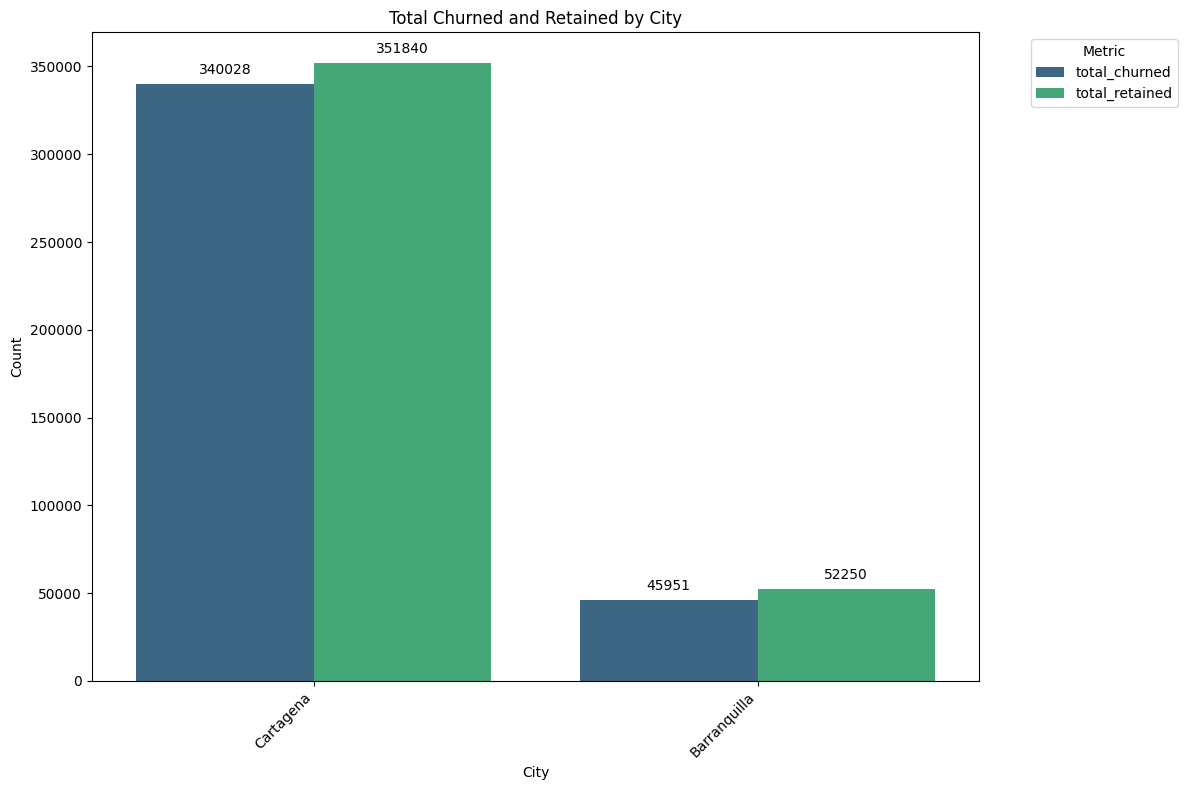

In [64]:
# Total Churned and Retained by City

df_city_summary = df_merged.groupby("City").agg(
    total_churned=("total_churned", "sum"),
    total_retained=("total_retained", "sum")
).reset_index()

df_city_summary = df_city_summary.sort_values("total_churned", ascending=False)

df_city_melted = df_city_summary.melt(
    id_vars=["City"], 
    value_vars=["total_churned", "total_retained"], 
    var_name="metric", 
    value_name="value"
)

plt.figure(figsize=(12, 8))  
ax = sns.barplot(
    data=df_city_melted, 
    x="City", 
    y="value", 
    hue="metric",  
    palette="viridis"  
)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Format as integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )


plt.xlabel("City")
plt.ylabel("Count")
plt.title("Total Churned and Retained by City")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Total Churned and Retained by City shows that we had a bigger impact on Cartagena than Barranquilla. 

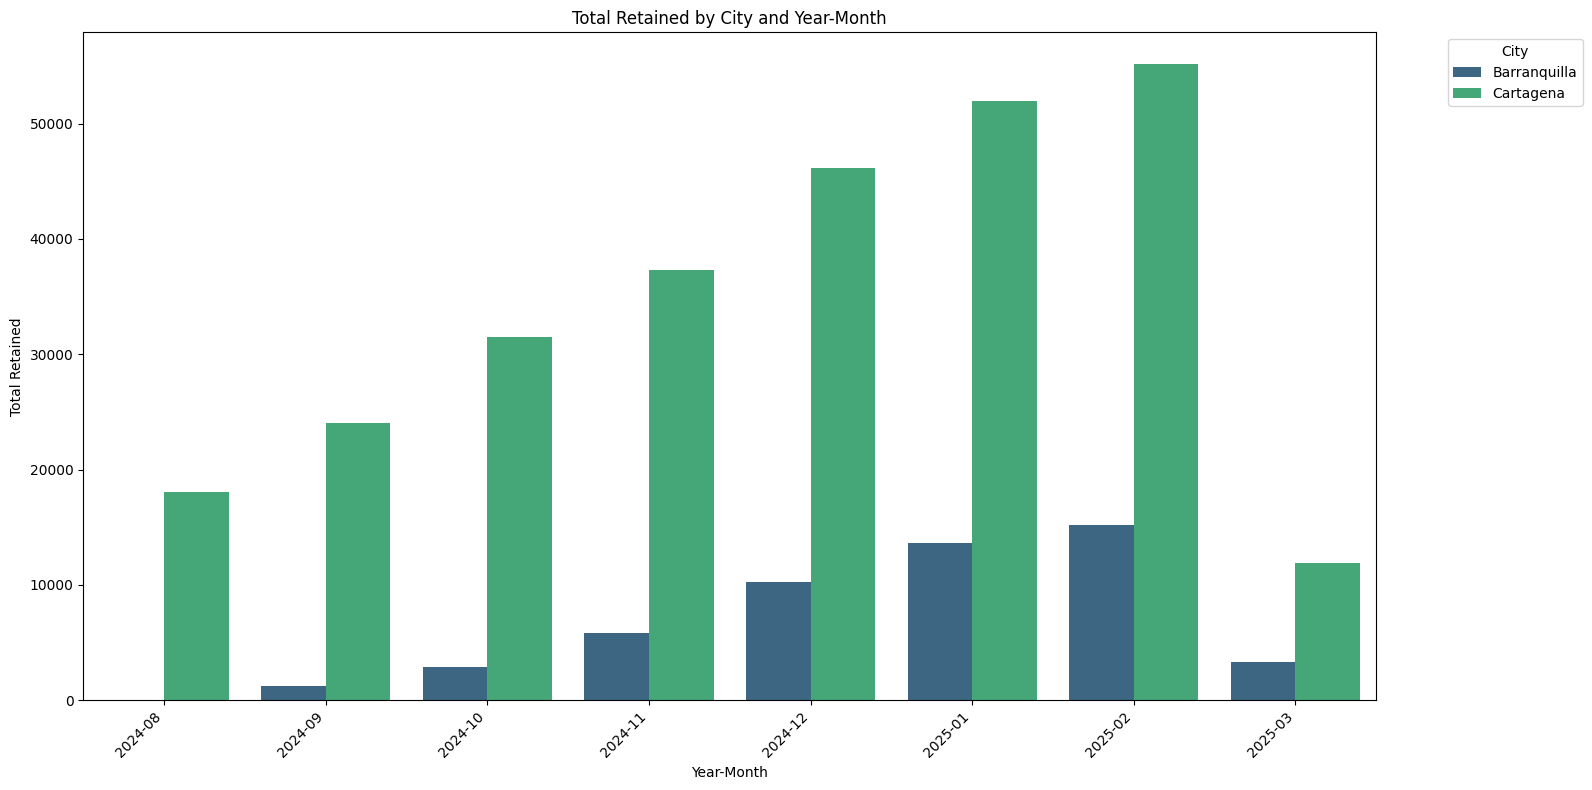

           City year_month  new_clients
0  Barranquilla    2024-08            1
1  Barranquilla    2024-09         1092
2  Barranquilla    2024-10         2579
3  Barranquilla    2024-11         4694
4  Barranquilla    2024-12         6296


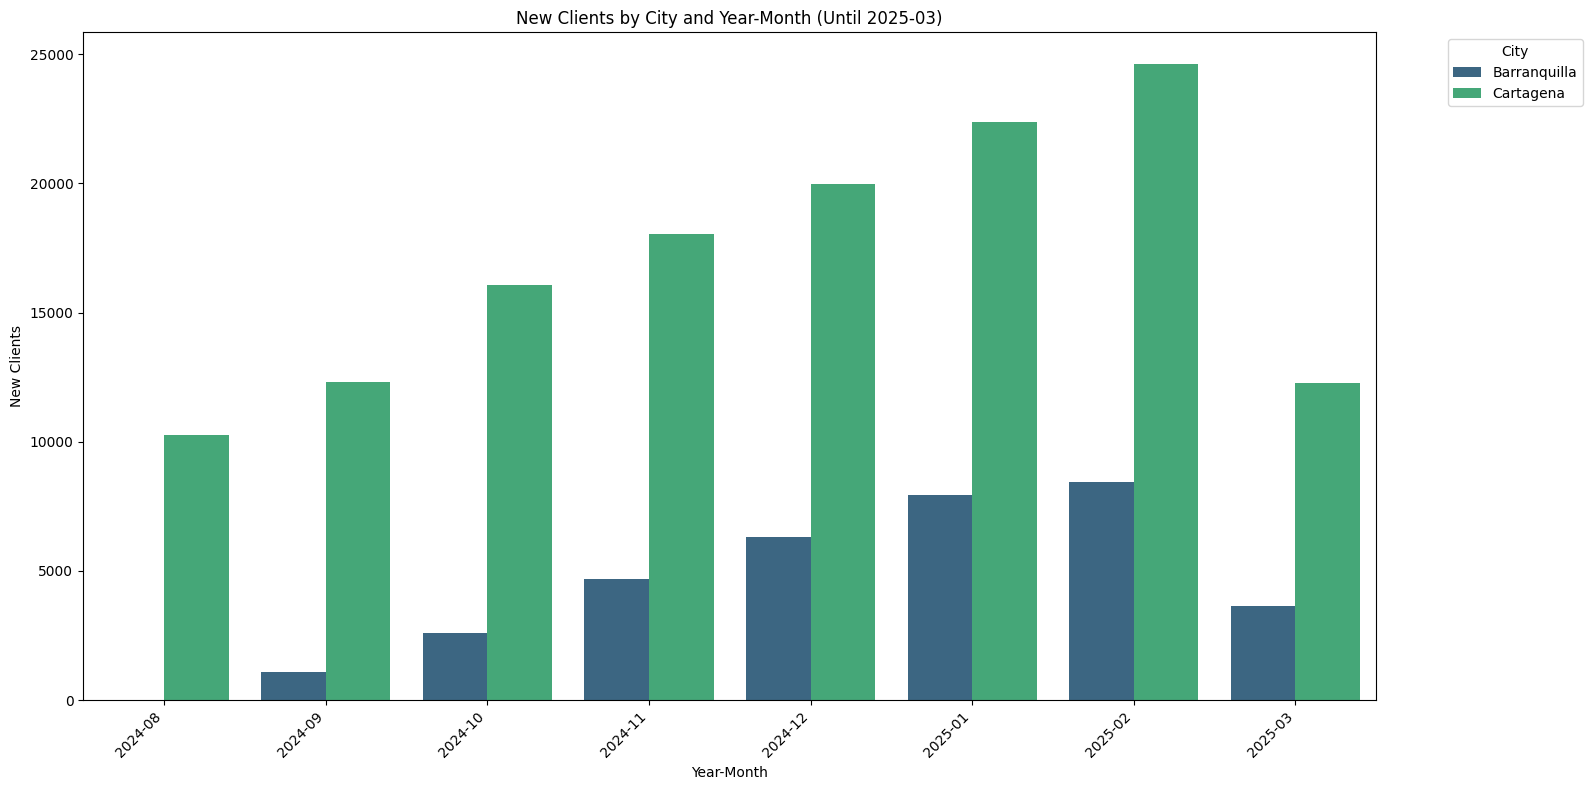

In [75]:
#### Total Retained by City and Year-Month

df_merged["year_month"] = pd.to_datetime(df_merged["year_month"]).dt.strftime("%Y-%m")
df_filtered = df_merged[df_merged["year_month"] > "2024-07"]
df_filtered = df_filtered.sort_values(["City", "year_month"])

df_city_month_retained = df_filtered.groupby(["City", "year_month"]).agg(
    total_retained=("total_retained", "sum")
).reset_index()

plt.figure(figsize=(16, 8)) 
ax = sns.barplot(
    data=df_city_month_retained, 
    x="year_month", 
    y="total_retained", 
    hue="City", 
    palette="viridis" 
)

plt.xlabel("Year-Month")
plt.ylabel("Total Retained")
plt.title("Total Retained by City and Year-Month")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### New Clients by City and Year-Month

df_city_month_new_clients = df_filtered.groupby(["City", "year_month"]).agg(
    new_clients=("id", "nunique")  # Count unique id values
).reset_index()

print(df_city_month_new_clients.head())

plt.figure(figsize=(16, 8)) 
ax = sns.barplot(
    data=df_city_month_new_clients, 
    x="year_month", 
    y="new_clients", 
    hue="City", 
    palette="viridis" 
)

plt.xlabel("Year-Month")
plt.ylabel("New Clients")
plt.title("New Clients by City and Year-Month (Until 2025-03)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

#### New Clients and Total Retained display the same behavior, it looks like there was an exponential in new deals in Cartagena and also in Barranquilla, however, Barranquilla is not growing at the same pace, data shows that we started having our first client in 2024-08.

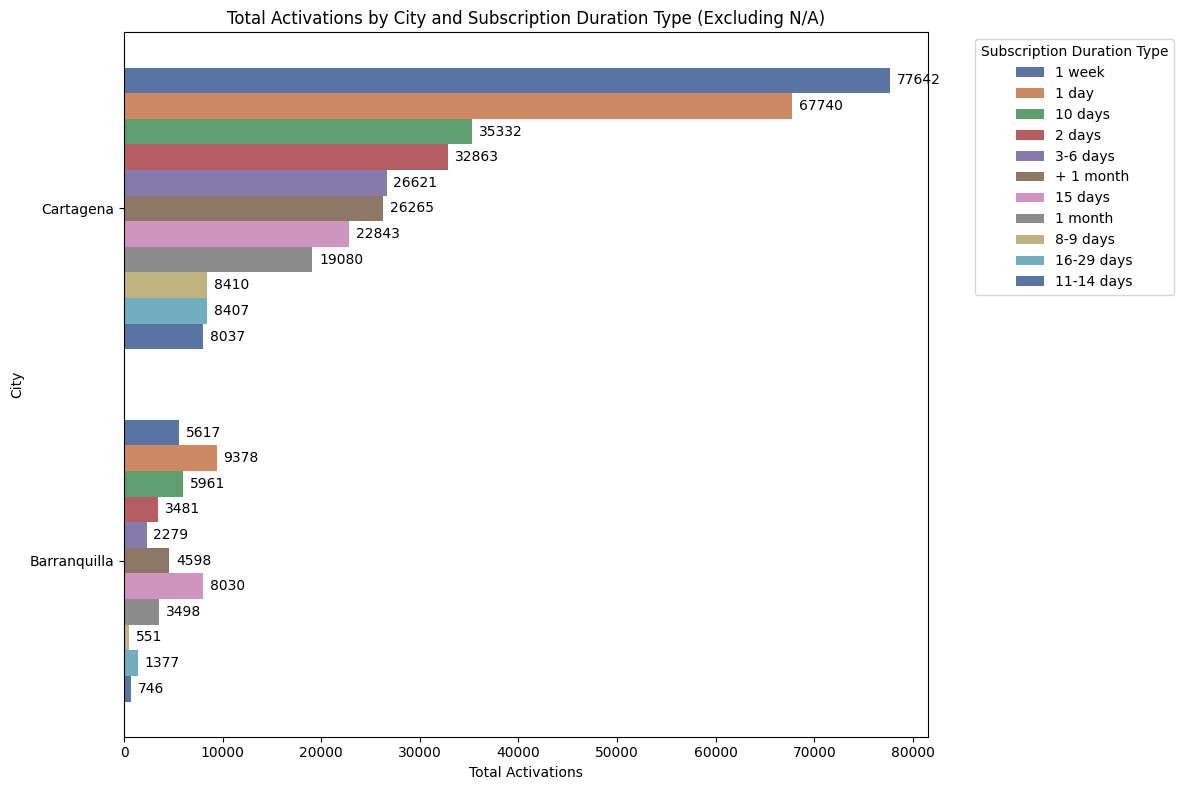

In [ ]:
# Total Activations by City and Subscription Duration Type

df_filtered = df_merged[df_merged["subscription_duration_type"] != "N/A"]
df_city_subscription_summary = df_filtered.groupby(["City", "subscription_duration_type"]).agg(
    total_activations=("total_retained", "sum") 
).reset_index()

df_city_subscription_summary = df_city_subscription_summary.sort_values("total_activations", ascending=False)
city_order = df_city_subscription_summary.groupby("City")["total_activations"].sum().sort_values(ascending=False).index


plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_city_subscription_summary, 
    y="City",  # Swap x and y for horizontal bars
    x="total_activations", 
    hue="subscription_duration_type",  # Differentiate by subscription_duration_type
    palette="deep",  # Use a beautiful color palette
    order=city_order  # Order cities by total_activations
)

# Add column values (total_activations) at the end of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Format as integer
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position of the annotation
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(5, 0),  # Offset from the bar
        textcoords='offset points'
    )

# Add labels and title
plt.ylabel("City")
plt.xlabel("Total Activations")
plt.title("Total Activations by City and Subscription Duration Type")

# Move the legend outside the plot
plt.legend(title="Subscription Duration Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

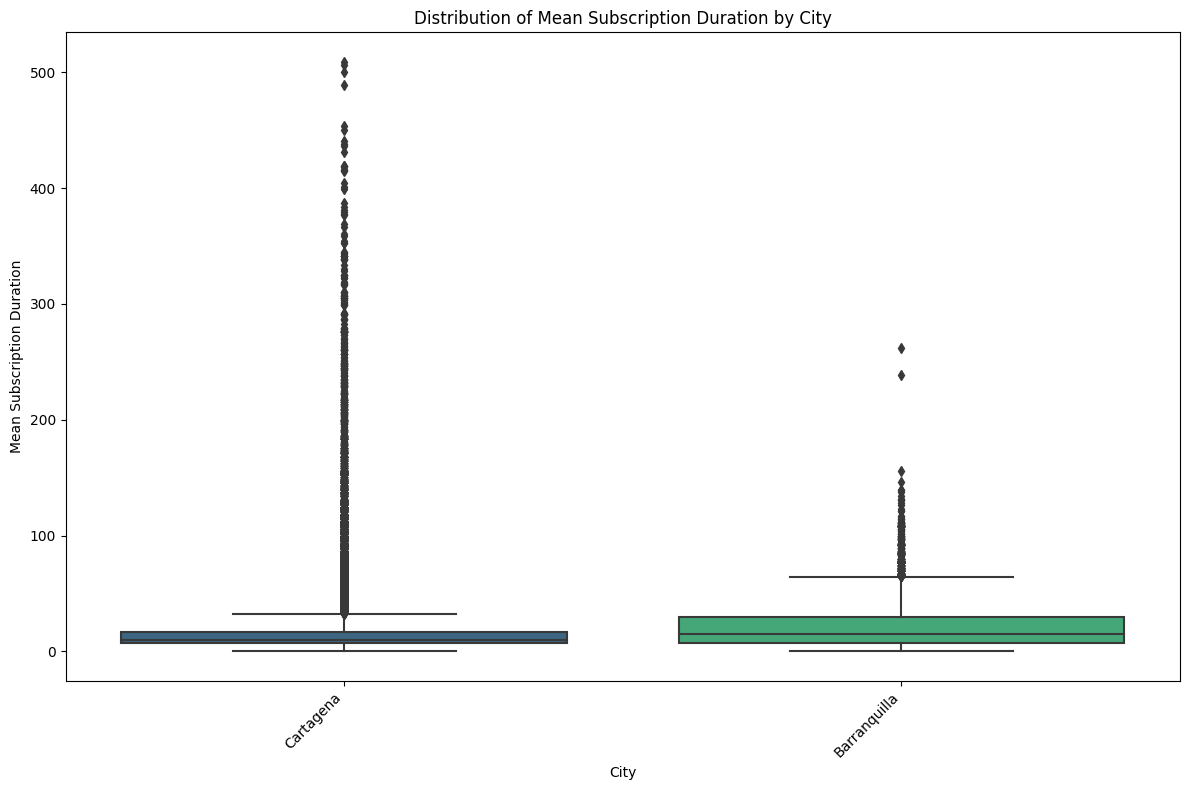

In [ ]:
# Group by City and calculate the mean of mean_subscription_duration
df_city_subscription_duration = df_merged.groupby("City")["mean_subscription_duration"].mean().reset_index()

# Create a box plot
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.boxplot(
    data=df_merged, 
    x="City", 
    y="mean_subscription_duration", 
    palette="viridis"  # Use a beautiful color palette
)

# Add labels and title
plt.xlabel("City")
plt.ylabel("Mean Subscription Duration")
plt.title("Distribution of Mean Subscription Duration by City")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

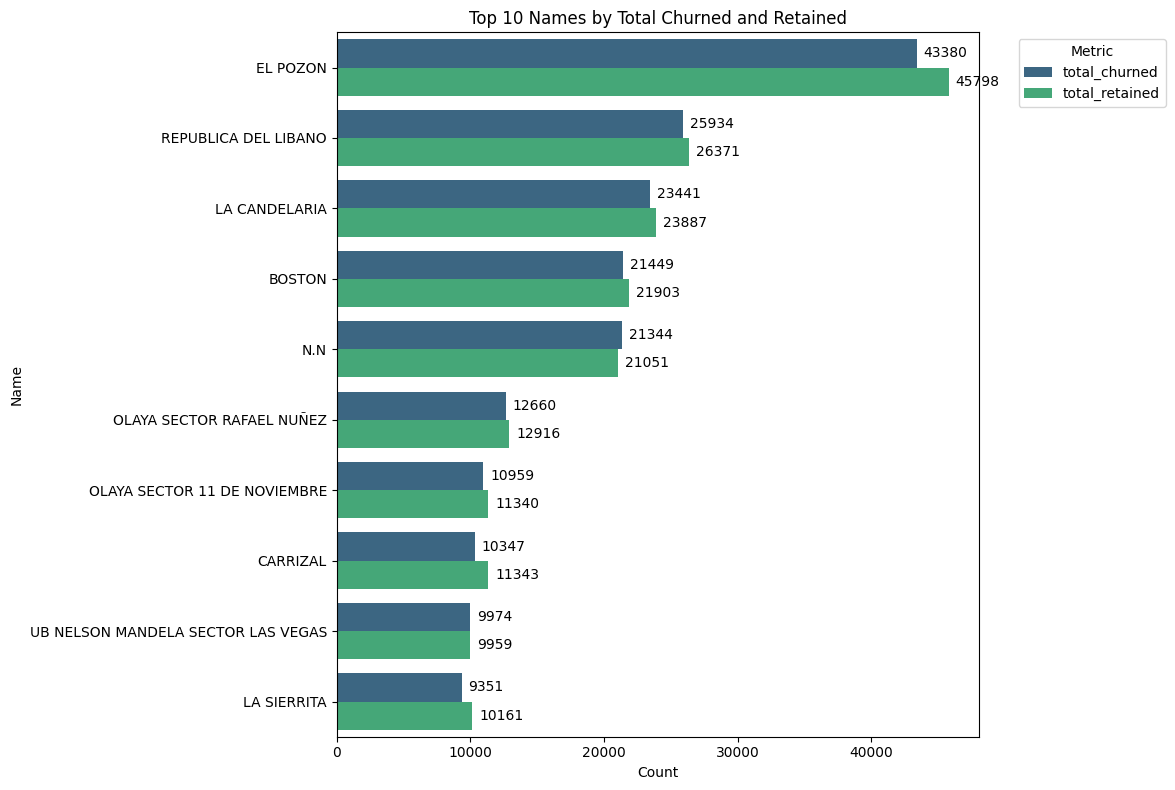

In [ ]:
# Group by name and sum total_churned and total_retained
df_name_summary = df_merged.groupby("name").agg(
    total_churned=("total_churned", "sum"),
    total_retained=("total_retained", "sum")
).reset_index()

# Sort the DataFrame by total_churned in descending order and select the top 10
df_name_summary = df_name_summary.sort_values("total_churned", ascending=False).head(10)

# Melt the DataFrame to long format for Seaborn
df_name_melted = df_name_summary.melt(
    id_vars=["name"], 
    value_vars=["total_churned", "total_retained"], 
    var_name="metric", 
    value_name="value"
)

# Create a horizontal grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_name_melted, 
    y="name",  # Swap x and y for horizontal bars
    x="value", 
    hue="metric",  # Differentiate between total_churned and total_retained
    palette="viridis"  # Use a beautiful color palette
)

# Add column values (total_churned and total_retained) at the end of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Format as integer
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position of the annotation
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(5, 0),  # Offset from the bar
        textcoords='offset points'
    )

# Add labels and title
plt.ylabel("Name")
plt.xlabel("Count")
plt.title("Top 10 Names by Total Churned and Retained")

# Move the legend outside the plot
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

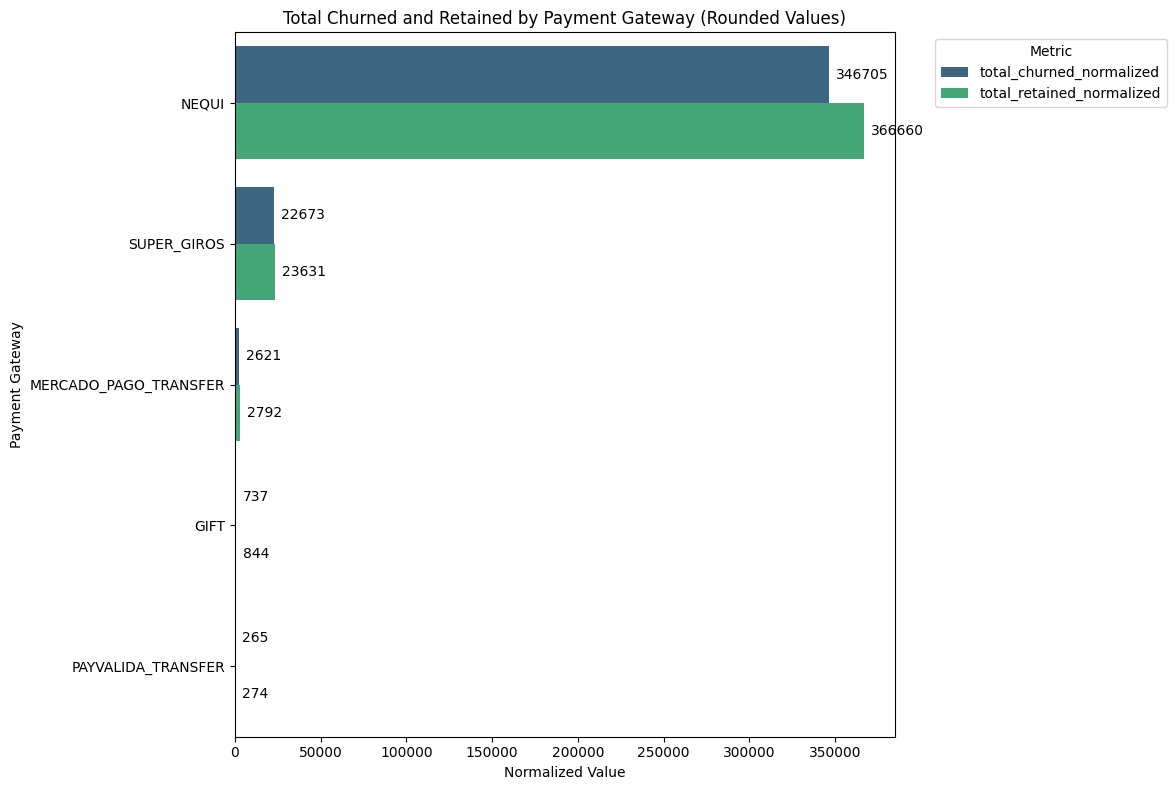

In [ ]:
# Group by payment_gateway and sum total_churned_normalized and total_retained_normalized
df_payment_summary = df_final_norm.groupby("payment_gateway").agg(
    total_churned_normalized=("total_churned_normalized", lambda x: round(x.sum())),  # Round to nearest integer
    total_retained_normalized=("total_retained_normalized", lambda x: round(x.sum()))  # Round to nearest integer
).reset_index()

# Sort the DataFrame by total_churned_normalized in descending order
df_payment_summary = df_payment_summary.sort_values("total_churned_normalized", ascending=False)

# Melt the DataFrame to long format for Seaborn
df_payment_melted = df_payment_summary.melt(
    id_vars=["payment_gateway"], 
    value_vars=["total_churned_normalized", "total_retained_normalized"], 
    var_name="metric", 
    value_name="value"
)

# Create a horizontal grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_payment_melted, 
    y="payment_gateway",  # Swap x and y for horizontal bars
    x="value", 
    hue="metric",  # Differentiate between total_churned_normalized and total_retained_normalized
    palette="viridis"  # Use a beautiful color palette
)

# Add column values (total_churned_normalized and total_retained_normalized) at the end of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Format as integer
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position of the annotation
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(5, 0),  # Offset from the bar
        textcoords='offset points'
    )

# Add labels and title
plt.ylabel("Payment Gateway")
plt.xlabel("Normalized Value")
plt.title("Total Churned and Retained by Payment Gateway (Rounded Values)")

# Move the legend outside the plot
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

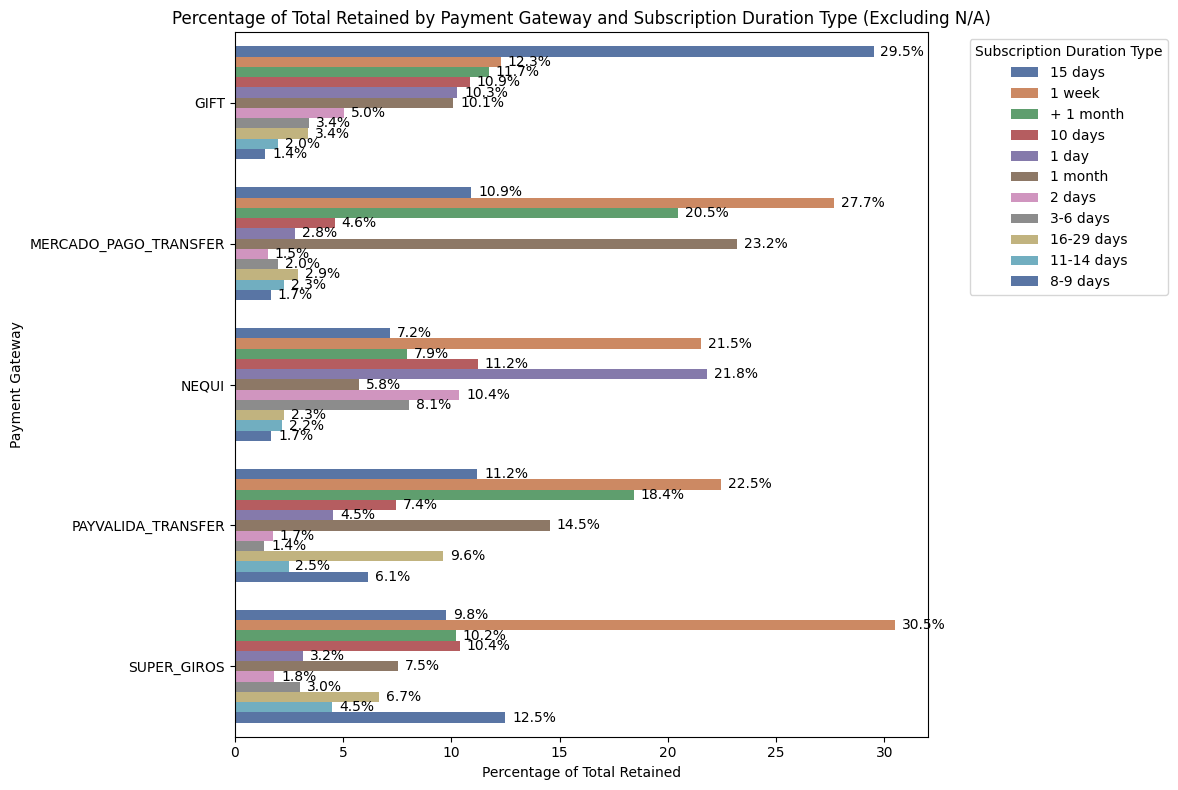

In [ ]:
# Filter out rows where subscription_duration_type is "N/A"
df_filtered = df_final_norm[df_final_norm["subscription_duration_type"] != "N/A"]

# Group by payment_gateway and subscription_duration_type, and sum total_retained_normalized
df_payment_duration_summary = df_filtered.groupby(
    ["payment_gateway", "subscription_duration_type"]
).agg(
    total_retained_normalized=("total_retained_normalized", "sum")
).reset_index()

# Calculate the percentage of total_retained_normalized for each payment_gateway
df_payment_duration_summary["percentage"] = df_payment_duration_summary.groupby("payment_gateway")[
    "total_retained_normalized"
].transform(lambda x: (x / x.sum()) * 100)

# Sort the DataFrame by payment_gateway and percentage in descending order
df_payment_duration_summary = df_payment_duration_summary.sort_values(
    by=["payment_gateway", "percentage"], ascending=[True, False]
)

# Create a horizontal grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_payment_duration_summary, 
    y="payment_gateway",  # Swap x and y for horizontal bars
    x="percentage", 
    hue="subscription_duration_type",  # Differentiate by subscription_duration_type
    palette="deep"  # Use a beautiful color palette
)

# Add column values (percentage) at the end of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.1f}%",  # Format as percentage with 1 decimal place
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position of the annotation
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(5, 0),  # Offset from the bar
        textcoords='offset points'
    )

# Add labels and title
plt.ylabel("Payment Gateway")
plt.xlabel("Percentage of Total Retained")
plt.title("Percentage of Total Retained by Payment Gateway and Subscription Duration Type (Excluding N/A)")

# Move the legend outside the plot
plt.legend(title="Subscription Duration Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

  year_month        payment_gateway  total_churned_normalized  \
0    2023-07                   GIFT                  0.021739   
1    2023-07  MERCADO_PAGO_TRANSFER                  0.198513   
2    2023-07                  NEQUI                 28.364707   
3    2023-07            SUPER_GIROS                  4.415042   
4    2023-08                   GIFT                  1.700931   

   total_subscription_duration_normalized  
0                                0.000000  
1                               16.135001  
2                              790.193247  
3                              110.671752  
4                               42.181379  


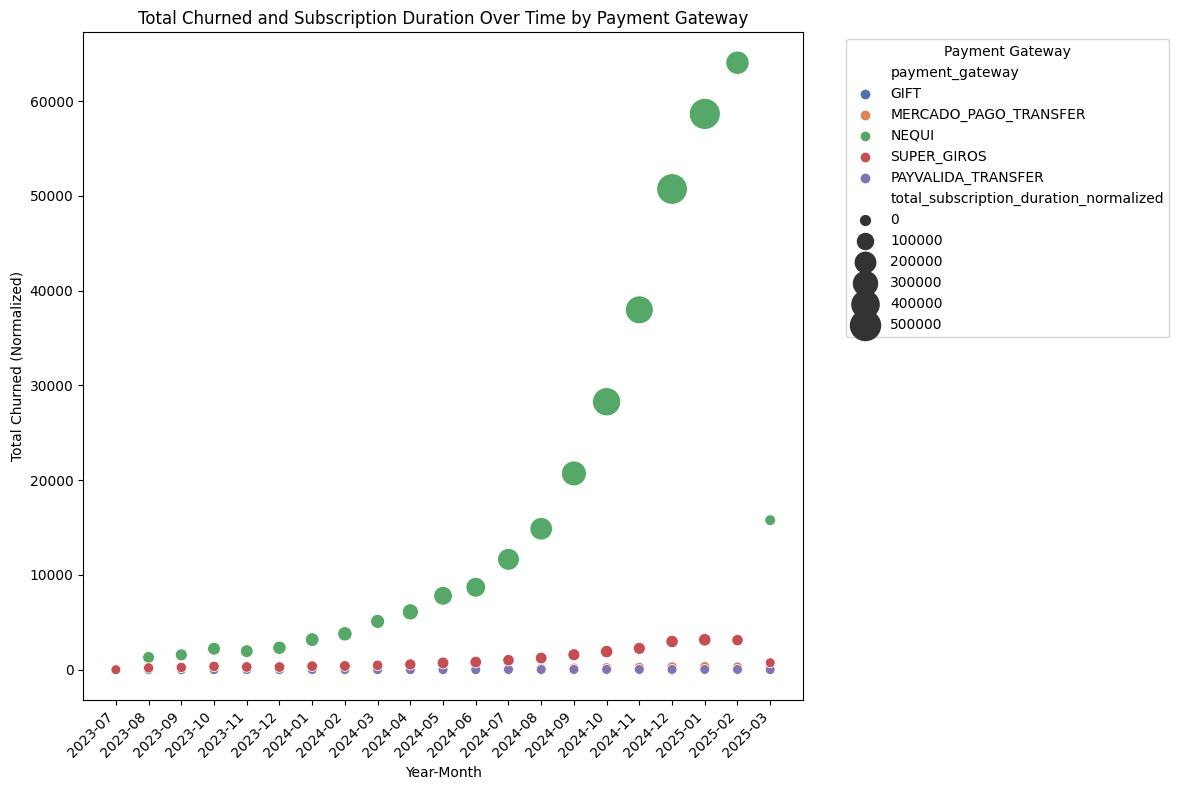

In [ ]:
# Group by year_month and payment_gateway, and sum total_churned_normalized and total_subscription_duration_normalized
df_grouped = df_final_norm.groupby(["year_month", "payment_gateway"]).agg(
    total_churned_normalized=("total_churned_normalized", "sum"),
    total_subscription_duration_normalized=("total_subscription_duration_normalized", "sum")
).reset_index()

# Print the grouped DataFrame
print(df_grouped.head())

# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 8))  # Adjust figure size
g = sns.scatterplot(
    data=df_grouped, 
    x="year_month", 
    y="total_churned_normalized", 
    hue="payment_gateway",  # Differentiate by payment_gateway
    size="total_subscription_duration_normalized",  # Use total_subscription_duration_normalized for size
    sizes=(50, 500),  # Adjust the size range of the points
    palette="deep"  # Use a beautiful color palette
)

# Add labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Churned (Normalized)")
plt.title("Total Churned and Subscription Duration Over Time by Payment Gateway")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title="Payment Gateway", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## Step 7. Actionable Insights

## other validations

In [353]:
unique_gaiia_ids = df_merged["gaiia_id"].unique().tolist()
print(unique_gaiia_ids)

[15206.0, 17328.0, 17295.0, 17161.0, 16310.0, 16371.0, 16801.0, 16332.0, 17365.0, 17198.0, 17306.0, 15619.0, 16200.0, 15782.0, 16190.0, 16234.0, 15374.0, 15873.0, 17459.0, 17067.0, 17502.0, 15629.0, 17029.0, 16987.0, 17192.0, 16344.0, 15280.0, 16643.0, 15096.0, 16393.0, 15861.0, 15248.0, 15078.0, 16375.0, 16186.0, 15926.0, 17363.0, 17367.0, 17308.0, 16983.0, 15392.0, 15222.0, 17373.0, 16086.0, 16033.0, 15734.0, 15710.0, 16652.0, 17155.0, 15871.0, 16364.0, 16480.0, 15026.0, 16262.0, 16194.0, 16098.0, 15609.0, 15854.0, 17310.0, 16250.0, 16321.0, 15468.0, 15784.0, 16956.0, 15365.0, 15574.0, 15107.0, 15394.0, 17018.0, 17412.0, 15332.0, 16441.0, 17304.0, 15562.0, 15970.0, 15061.0, 16088.0, 15249.0, 16304.0, 15471.0, 17283.0, 17388.0, 15519.0, 17353.0, 15447.0, 16428.0, 15496.0, 16288.0, 17426.0, 16609.0, 16438.0, 15232.0, 16117.0, 16362.0, 15203.0, 16629.0, 15639.0, 17114.0, 16350.0, 15359.0, 15983.0, 16014.0, 17357.0, 17513.0, 16563.0, 17257.0, 16405.0, 17309.0, 15472.0, 16161.0, 16102.0, 

In [434]:
display(df_final_norm.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096049 entries, 0 to 9096048
Data columns (total 20 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   id_client                               int64         
 1   gaiia_id                                float64       
 2   City                                    object        
 3   name                                    object        
 4   subscription_duration_type              object        
 5   year_month                              object        
 6   total_churned                           int64         
 7   total_retained                          int64         
 8   mean_subscription_duration              float64       
 9   total_subscription_duration             float64       
 10  id_invoice                              int64         
 11  created_at                              datetime64[ns]
 12  client_id_x                             in

None

In [433]:
#duplicates validation

display(df_client_journey[df_client_journey["gaiia_id"] == 32417]["churned"].sum())
display(df_client_journey[df_client_journey["gaiia_id"] == 32417]["retained"].sum())
display(df_client_journey[df_client_journey["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_merged[df_merged["gaiia_id"] == 32417]["total_churned"].sum())
display(df_merged[df_merged["gaiia_id"] == 32417]["total_retained"].sum())
display(df_merged[df_merged["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_merged_agg[df_merged_agg["gaiia_id"] == 32417]["total_churned"].sum())
display(df_merged_agg[df_merged_agg["gaiia_id"] == 32417]["total_retained"].sum())
display(df_merged_agg[df_merged_agg["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_final[df_final["gaiia_id"] == 32417]["total_churned"].sum())
display(df_final[df_final["gaiia_id"] == 32417]["total_retained"].sum())
display(df_final[df_final["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_final_norm[df_final_norm["gaiia_id"] == 32417]["total_churned_normalized"].sum())
display(df_final_norm[df_final_norm["gaiia_id"] == 32417]["total_retained_normalized"].sum())
display(df_final_norm[df_final_norm["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

9

9

N/A          9
1 week       3
15 days      2
10 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

9

9

N/A          5
1 week       3
15 days      2
10 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

9

9

N/A          5
1 week       3
10 days      2
15 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

90

90

N/A          50
1 week       30
10 days      20
15 days      20
+ 1 month    10
8-9 days     10
Name: subscription_duration_type, dtype: int64

8.999999999999998

9.0

N/A          50
1 week       30
10 days      20
15 days      20
+ 1 month    10
8-9 days     10
Name: subscription_duration_type, dtype: int64